# Séries Temporais

In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error

In [3]:
# Função para plotar séries temporais
def plot_series(series, title):
    plt.figure(figsize=(12,6))
    plt.plot(series)
    plt.title(title)
    plt.show()

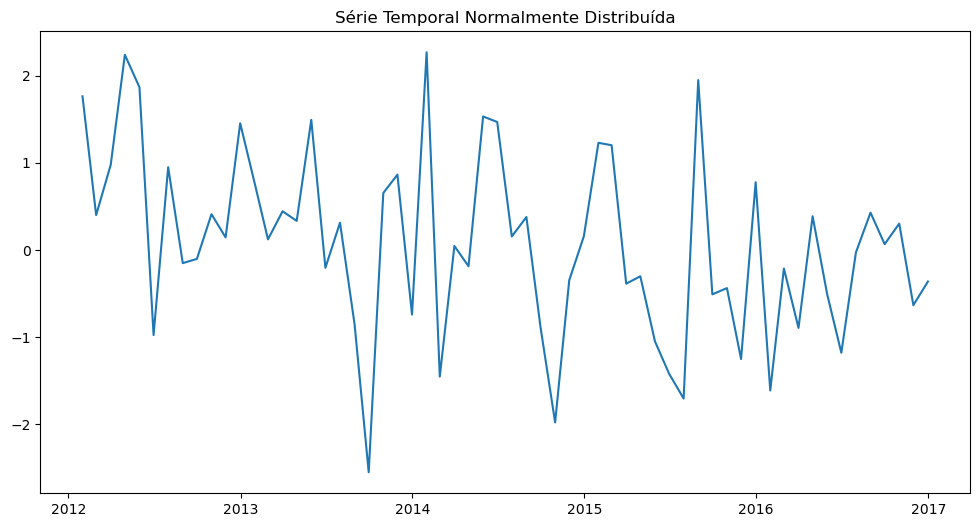

In [4]:
# Criando uma série temporal normalmente distribuída
np.random.seed(0)
serie1 = np.random.normal(size=60)
serie1 = pd.Series(serie1, index=pd.date_range(start='2012-01-01', periods=60, freq='M'))
plot_series(serie1, 'Série Temporal Normalmente Distribuída')

In [5]:
# Lendo o dataset
dados1 = pd.read_csv("C:/Users/Lenovo/Desktop/R/3 - MODELOS ESTATÍSTICOS/Series Temporais/DadosEmpregoIA.csv", sep=';')

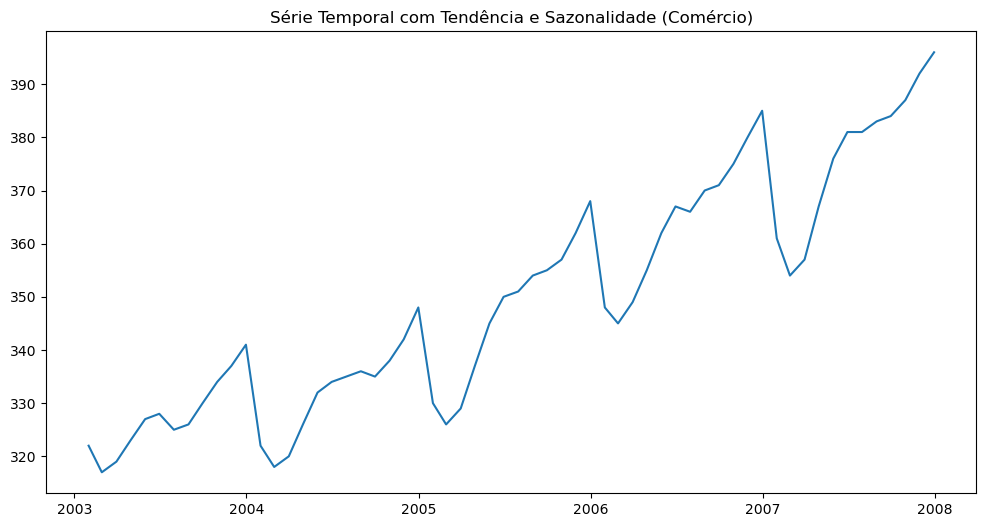

In [6]:
# Série temporal com tendência e sazonalidade
serie2 = pd.Series(dados1['Comercio'].values, index=pd.date_range(start='2003-01-01', periods=len(dados1), freq='M'))
plot_series(serie2, 'Série Temporal com Tendência e Sazonalidade (Comércio)')

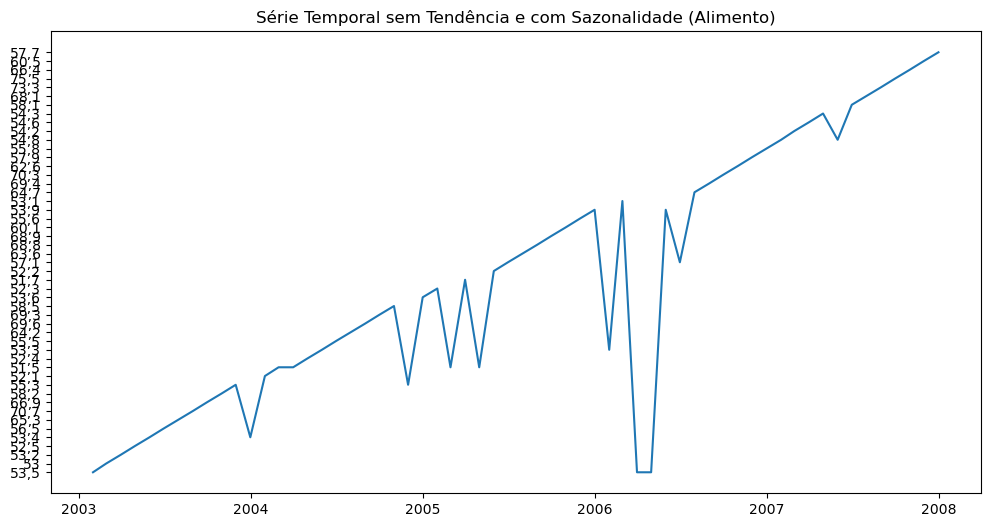

In [7]:
# Sem tendência e com sazonalidade
serie3 = pd.Series(dados1['Alimento'].values, index=pd.date_range(start='2003-01-01', periods=len(dados1), freq='M'))
plot_series(serie3, 'Série Temporal sem Tendência e com Sazonalidade (Alimento)')

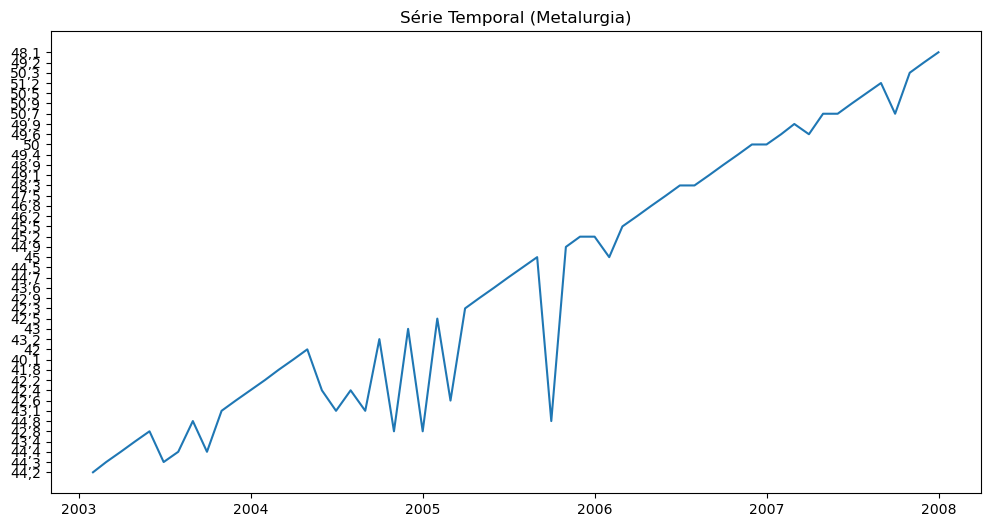

In [8]:
# Talvez tendência
serie4 = pd.Series(dados1['Metalurgia'].values, index=pd.date_range(start='2003-01-01', periods=len(dados1), freq='M'))
plot_series(serie4, 'Série Temporal (Metalurgia)')

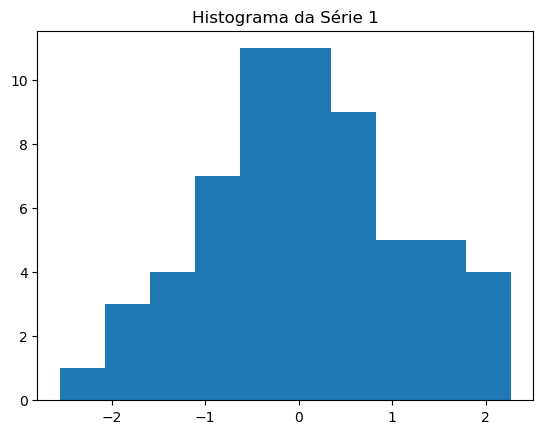

In [9]:
# Análise série 1
plt.hist(serie1)
plt.title('Histograma da Série 1')
plt.show()

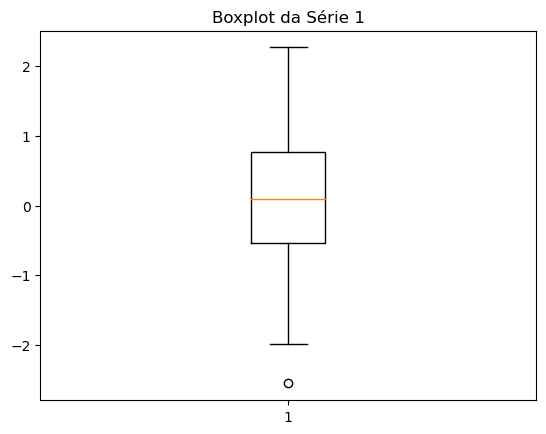

In [10]:
plt.boxplot(serie1)
plt.title('Boxplot da Série 1')
plt.show()

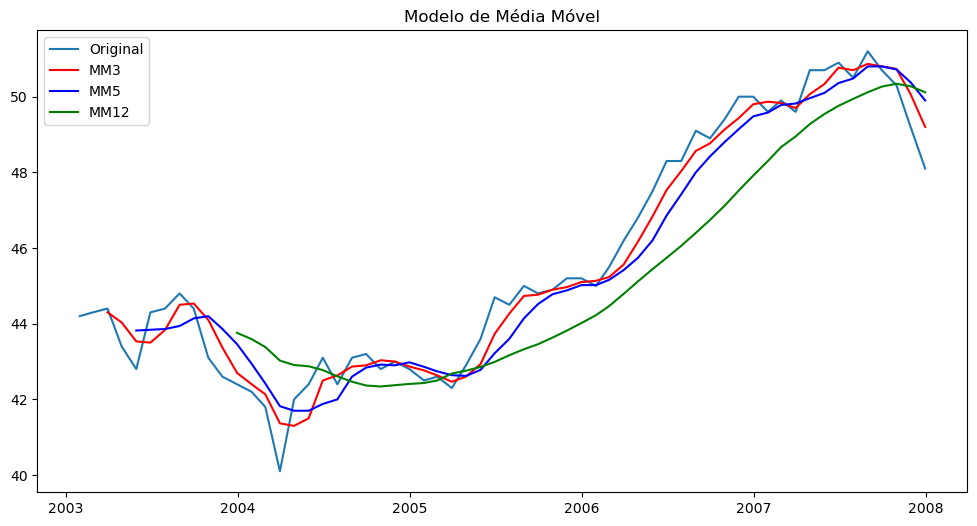

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para calcular a média móvel
def moving_average(series, window):
    return series.rolling(window=window).mean()

# Supondo que 'serie4' seja uma série temporal do Pandas com valores numéricos em formato de string
# Por exemplo: serie4 = pd.Series(['44,2', '45,3', '43,8', ...])

# Convertendo os valores de string para float
serie4 = serie4.str.replace(',', '.').astype(float)

seriemm1 = moving_average(serie4, 3)
seriemm2 = moving_average(serie4, 5)
seriemm3 = moving_average(serie4, 12)

plt.figure(figsize=(12, 6))
plt.plot(serie4, label='Original')
plt.plot(seriemm1, label='MM3', color='red')
plt.plot(seriemm2, label='MM5', color='blue')
plt.plot(seriemm3, label='MM12', color='green')
plt.legend(loc='best')
plt.title('Modelo de Média Móvel')
plt.show()

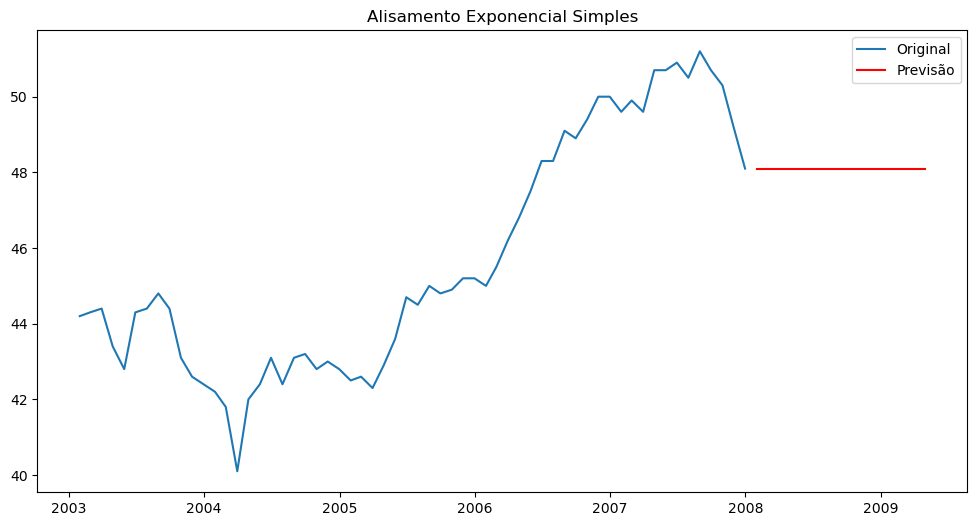

In [21]:
# Alisamento Exponencial Simples
modelo1 = SimpleExpSmoothing(serie4).fit()
prev1 = modelo1.forecast(16)

plt.figure(figsize=(12,6))
plt.plot(serie4, label='Original')
plt.plot(prev1, label='Previsão', color='red')
plt.legend(loc='best')
plt.title('Alisamento Exponencial Simples')
plt.show()

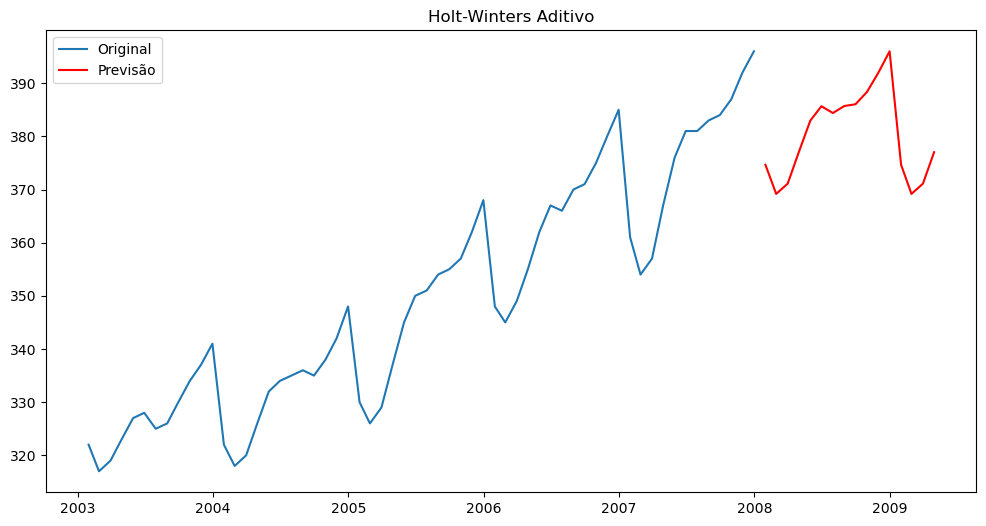

In [13]:
# Alisamento Exponencial - Holt Winters - Aditivo
modelo2 = ExponentialSmoothing(serie2, seasonal='add', seasonal_periods=12).fit()
prev2 = modelo2.forecast(16)

plt.figure(figsize=(12,6))
plt.plot(serie2, label='Original')
plt.plot(prev2, label='Previsão', color='red')
plt.legend(loc='best')
plt.title('Holt-Winters Aditivo')
plt.show()

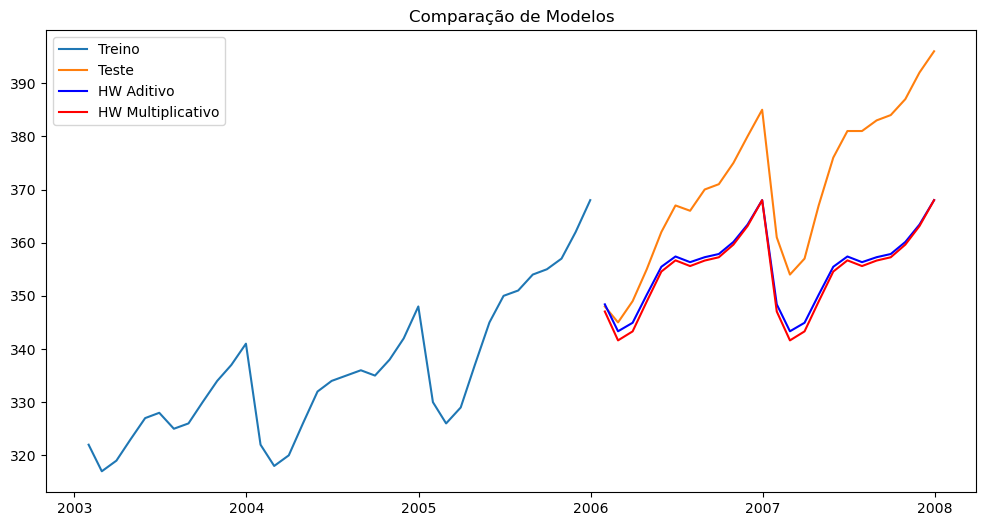

In [14]:
# Comparação de Modelos
train = serie2[:'2005-12']
test = serie2['2006-01':]

modelo3 = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
prev3 = modelo3.forecast(len(test))

modelo4 = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
prev4 = modelo4.forecast(len(test))

plt.figure(figsize=(12,6))
plt.plot(train, label='Treino')
plt.plot(test, label='Teste')
plt.plot(prev3, label='HW Aditivo', color='blue')
plt.plot(prev4, label='HW Multiplicativo', color='red')
plt.legend(loc='best')
plt.title('Comparação de Modelos')
plt.show()

In [15]:
# Métricas de acurácia
mse_add = mean_squared_error(test, prev3)
mse_mul = mean_squared_error(test, prev4)
print(f'MSE Holt-Winters Aditivo: {mse_add}')
print(f'MSE Holt-Winters Multiplicativo: {mse_mul}')

MSE Holt-Winters Aditivo: 306.13849585184175
MSE Holt-Winters Multiplicativo: 327.6508102563091
